In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [29]:
def cleandata(data):
    df = data.copy()
    
    df["VIP"] = df["VIP"].astype(bool)
    df["VIP"] = df["VIP"].astype(int)
    
    df["CryoSleep"] = df["CryoSleep"].astype(bool)
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    
    #df["Transported"] = df["Transported"].astype(int)
    
    df[['deck','num','side']] = df['Cabin'].str.split('/',expand=True)
    df["num"] = df["num"].astype(float)
    
    df.drop(['PassengerId', 'Name', 'Cabin'],axis=1,inplace=True)
    
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    df['deck'] = df['deck'].fillna(df['deck'].mode()[0])
    df['side'] = df['side'].fillna(df['side'].mode()[0])
    
    df['num'] = df['num'].fillna(df['num'].mean())
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Spa'] = df['Spa'].fillna(df['Spa'].mean())
    df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].mean())
    df['RoomService'] = df['RoomService'].fillna(df['RoomService'].mean())
    df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].mean())
    df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
    
    df['deck'] = df['deck'].replace(['A','B','C','D','E','F','G','T'], [10,20,30,40,50,60,70,80])
    df['side'] = df['side'].replace(['P','S'], [0,1])
    
    return df

In [8]:
train01 = cleandata(train)

In [9]:
train02 = pd.get_dummies(train01, columns=['HomePlanet','Destination'], drop_first=False)

In [10]:
train02

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,20,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,60,0.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10,0.0,1,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,10,0.0,1,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,60,1.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,10,98.0,0,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,70,1499.0,1,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,70,1500.0,1,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,50,608.0,1,0,1,0,1,0,0


<AxesSubplot:>

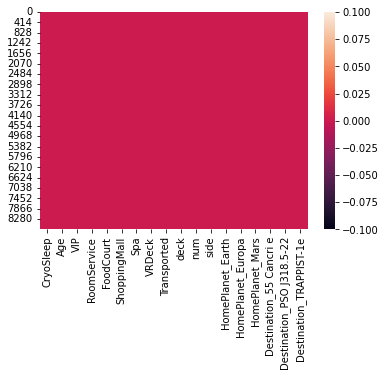

In [11]:
sns.heatmap(train02.isnull())

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train02, test_size=0.2, random_state=42)

In [13]:
y_train = train_set['Transported']
X_train = train_set.drop(['Transported'], axis=1)

y_test = test_set['Transported']
X_test = test_set.drop(['Transported'], axis=1)

In [15]:
from xgboost import XGBRegressor
model = XGBRegressor()

In [16]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [17]:
y_pred = model.predict(X_test)

In [23]:
y_train

2333    0
2589    0
8302    1
8177    1
500     1
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Transported, Length: 6954, dtype: int32

In [24]:
y_val = np.array(y_test)
y_val

array([1, 0, 0, ..., 0, 1, 0])

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred)

0.14317446615743198

In [28]:
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [30]:
X_test = cleandata(test)

In [32]:
X_test = pd.get_dummies(X_test, columns=['HomePlanet','Destination'], drop_first=False)

In [33]:
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,70,3.000000,1,1,0,0,0,0,1
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,60,4.000000,1,1,0,0,0,0,1
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,30,0.000000,1,0,1,0,1,0,0
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,30,1.000000,1,0,1,0,0,0,1
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,60,5.000000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,70,1496.000000,1,1,0,0,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,60,610.178836,1,1,0,0,0,0,1
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,40,296.000000,0,0,0,1,1,0,0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,40,297.000000,0,0,1,0,0,0,1


In [34]:
testids = test['PassengerId']

In [35]:
preds = model.predict(X_test)

In [36]:
preds

array([0.7439363 , 0.07650556, 0.90784997, ..., 0.9564271 , 0.7067021 ,
       0.6674365 ], dtype=float32)

In [38]:
def classif(a):
    if a<0.5:
        return 'False'
    else:
        return 'True'

In [43]:
preds = pd.DataFrame({'Transported':preds})

In [45]:
preds['Transported'] = (preds['Transported']>0.5).astype(int)

In [47]:
preds['Transported'] = preds['Transported'].astype(bool)

In [48]:
preds

,Transported
0,True
1,False
2,True
3,True
4,True
...,...
4272,True
4273,False
4274,True
4275,True


In [63]:
subdf = pd.DataFrame({'PassengerId':testids,
                     'Transported':preds['Transported']})
subdf

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [64]:
subdf.to_csv('sub03.csv',index=False)